In [1]:
import matplotlib.pyplot as plt

# Scikit-learn includes many helpful utilities
from sklearn.model_selection import train_test_split
from sklearn.utils import shuffle

import re
import numpy as np  
import os
import time
import json
from glob import glob
from PIL import Image
import pickle
import cv2
from sklearn.utils import shuffle

from IPython.display import clear_output, display
import os.path
from os import path
import shutil
import PIL
from pathlib import Path
from matplotlib import pyplot as plt

from IPython.display import clear_output

import numpy as np

from PIL import ImageFont
from PIL import Image, ImageDraw
from PIL import ImageColor

from scipy.ndimage.interpolation import map_coordinates
from scipy.ndimage.filters import gaussian_filter

import random

import time
import shutil
import uuid
from shutil import copyfile
from collections import Counter

import json

from scipy.ndimage.filters import gaussian_filter1d
from matplotlib.pyplot import figure

from mpl_toolkits.axes_grid1 import host_subplot
import matplotlib.pyplot as plt

In [2]:

noteach= [0.7894737124443054,
   0.7631579041481018,
   0.7894737124443054,
   0.7894737124443054,
   0.7789473533630371,
   0.7719298005104065,
   0.743107795715332,
   0.7094298005104065,
   0.6822612285614014,
   0.6587719321250916,
   0.6419457793235779,
   0.6293859481811523,
   0.6160593628883362,
   0.5958646535873413,
   0.5789473652839661,
   0.5707237124443054]

In [3]:
teach= [0.7456140518188477,
   0.7368420958518982,
   0.7426900863647461,
   0.7368420958518982,
   0.7280701994895935,
   0.7207602262496948,
   0.7042606472969055,
   0.6798245906829834,
   0.6588693857192993,
   0.6377192735671997,
   0.6116427183151245,
   0.5957602262496948,
   0.571524977684021,
   0.5501253008842468,
   0.5356724858283997,
   0.5202850699424744]

In [4]:
curriculum =[0.7982456088066101,
   0.7675438523292542,
   0.7251461744308472,
   0.7083333134651184,
   0.6947368383407593,
   0.6754385828971863,
   0.6578947305679321,
   0.6392543911933899,
   0.6198830604553223,
   0.5973684191703796,
   0.579744815826416,
   0.5665204524993896,
   0.551956832408905,
   0.530075192451477,
   0.5181286334991455,
   0.5137061476707458]

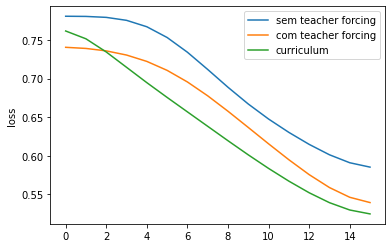

In [5]:
# plt.plot(train_loss)
plt.plot(gaussian_filter1d(noteach, sigma=2))
plt.plot(gaussian_filter1d(teach, sigma=2))
plt.plot(gaussian_filter1d(curriculum, sigma=2))

# plt.xlabel('Tamanho da sequência considerada')
plt.ylabel('loss')
plt.gca().legend(('sem teacher forcing','com teacher forcing', 'curriculum'))
plt.show()

In [6]:
best = [([0.8508771657943726,
   0.8464912176132202,
   0.8421052694320679,
   0.8333333134651184,
   0.8350877165794373,
   0.817251443862915,
   0.8070175647735596,
   0.7861841917037964,
   0.7709551453590393,
   0.7552631497383118,
   0.7336522936820984,
   0.7141813039779663,
   0.6977058053016663,
   0.6791979670524597,
   0.6649122834205627,
   0.6573464870452881],
  [0.07456140220165253,
   0.08552631735801697,
   0.09064327925443649,
   0.096491239964962,
   0.09576023370027542,
   0.11038011312484741,
   0.1216583102941513,
   0.13446637988090515,
   0.14746588468551636,
   0.15698830783367157,
   0.17236842215061188,
   0.18634259700775146,
   0.19982007145881653,
   0.21577905118465424,
   0.228684201836586,
   0.23622991144657135],
  'test-8lines')]

In [7]:
best[0][0]

[0.8508771657943726,
 0.8464912176132202,
 0.8421052694320679,
 0.8333333134651184,
 0.8350877165794373,
 0.817251443862915,
 0.8070175647735596,
 0.7861841917037964,
 0.7709551453590393,
 0.7552631497383118,
 0.7336522936820984,
 0.7141813039779663,
 0.6977058053016663,
 0.6791979670524597,
 0.6649122834205627,
 0.6573464870452881]

In [8]:
best[0][1]

[0.07456140220165253,
 0.08552631735801697,
 0.09064327925443649,
 0.096491239964962,
 0.09576023370027542,
 0.11038011312484741,
 0.1216583102941513,
 0.13446637988090515,
 0.14746588468551636,
 0.15698830783367157,
 0.17236842215061188,
 0.18634259700775146,
 0.19982007145881653,
 0.21577905118465424,
 0.228684201836586,
 0.23622991144657135]

In [9]:
data1 = best[0][0]
data2 = best[0][1]
t = np.arange(1, 16+1)

In [10]:
t

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16])

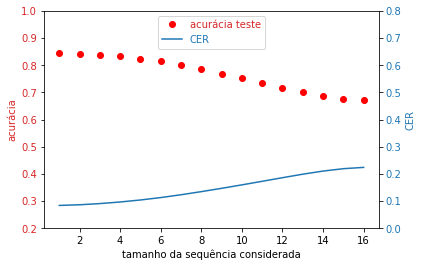

In [12]:
host = host_subplot(111)

#eixo x
host.set_xlabel("tamanho da sequência considerada")

# eixo 1
host.set_ylabel("acurácia")
host.set_ylim([0.2, 1])
host.tick_params(axis='y', labelcolor='tab:red')
host.yaxis.get_label().set_color(color='tab:red')

# eixo 2
par = host.twinx()
par.set_ylabel("CER")
par.tick_params(axis='y', labelcolor='tab:blue')
par.yaxis.get_label().set_color(color='tab:blue')
par.set_ylim([0, 0.8])


# graficos
host.plot(t, gaussian_filter1d(data1, sigma=2), 'ro', linewidth=2, label="acurácia teste")
par.plot(t, gaussian_filter1d(data2, sigma=2), color='tab:blue', label='CER')

# legendas
leg = plt.legend( loc='upper center')
leg.texts[0].set_color(color='tab:red')
leg.texts[1].set_color(color='tab:blue')


plt.show()



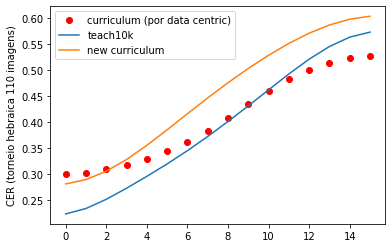

In [20]:
curriculum = [0.29204893112182617,
   0.29816514253616333,
   0.30071356892585754,
   0.3218654692173004,
   0.3258410096168518,
   0.33282366394996643,
   0.3521188199520111,
   0.3770068883895874,
   0.40468913316726685,
   0.437538206577301,
   0.46631917357444763,
   0.4966488778591156,
   0.5092684030532837,
   0.5225316882133484,
   0.5352089405059814,
   0.536735475063324]

teach10k = [0.18501529097557068,
   0.22171254456043243,
   0.26044851541519165,
   0.27427369356155396,
   0.2954128384590149,
   0.3083588182926178,
   0.34611186385154724,
   0.367928147315979,
   0.4026503264904022,
   0.4270642101764679,
   0.458854615688324,
   0.49802500009536743,
   0.5307339429855347,
   0.5586282014846802,
   0.5784199833869934,
   0.5997515320777893]

new_curriculum = [0.2584097981452942,
   0.2821100950241089,
   0.2900101840496063,
   0.3111620843410492,
   0.35611623525619507,
   0.38927116990089417,
   0.413608580827713,
   0.4510703682899475,
   0.4810567796230316,
   0.5082569122314453,
   0.5328190922737122,
   0.5577982068061829,
   0.5786755681037903,
   0.5992136001586914,
   0.6078695058822632,
   0.6174694299697876]

# plt.plot(train_loss)
plt.plot(gaussian_filter1d(curriculum, sigma=2), 'ro', linewidth=2)
plt.plot(gaussian_filter1d(teach10k, sigma=2))
plt.plot(gaussian_filter1d(new_curriculum, sigma=2))

# plt.xlabel('Tamanho da sequência considerada')
plt.ylabel('CER (torneio hebraica 110 imagens)')
plt.gca().legend(('curriculum (por data centric)','teach10k', 'new curriculum'))
plt.show()